In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy

In [2]:
#from platform import python_version
#python_version()

In [3]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

## Getting the directory name

In [4]:
import os
directory_path = os.getcwd()
nome_aglo = directory_path.split('/')[-1]
nome_aglo

'Berkeley_23'

## Getting RA&DEC from Bica 2019

In [5]:
df = pd.read_csv('../../lista.txt', comment= '#')
ra, dec = df.loc[df['Nome'] == nome_aglo]['_RAJ2000'].values[0], df.loc[df['Nome'] == nome_aglo]['_DEJ2000'].values[0]
ra, dec

(98.30833, 20.53056)

## Querying the data

In [6]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [7]:
meta = Gaia.load_table('gaiadr3.gaia_source')
meta

Retrieving table 'gaiadr3.gaia_source'


In [8]:
query = """SELECT 
ra, dec, pmra, pmra_error, pmdec, pmdec_error, bp_rp, phot_g_mean_mag, parallax, parallax_error, radial_velocity, radial_velocity_error, l,b
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(POINT('ICRS',ra,dec),
CIRCLE('ICRS', """ +  str(ra) + ',' + str(dec) + ',' + ' 0.2))'

In [9]:
job = Gaia.launch_job_async(query)
job

INFO: Query finished. [astroquery.utils.tap.core]


In [10]:
data = job.get_results()
len(data)

5423

In [11]:
#data

## Converting to pandas

In [12]:
df = data.to_pandas()
df

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
0,98.351975,20.334892,-0.388570,0.173544,-1.365909,0.122712,1.452368,17.887228,0.417362,0.145713,NaN,NaN,192.788731,5.328890
1,98.353966,20.338754,1.440507,0.274614,-0.630428,0.203405,1.207409,18.659582,0.279513,0.243476,NaN,NaN,192.786126,5.332306
2,98.350055,20.341862,0.859905,0.025662,-2.641193,0.020173,0.670877,14.261889,0.585068,0.024480,NaN,NaN,192.781672,5.330448
3,98.405085,20.352550,0.539376,0.352519,0.121199,0.246421,1.198135,18.868177,-0.162077,0.437457,NaN,NaN,192.795618,5.381278
4,98.411496,20.359128,2.152265,0.370010,-1.133286,0.263029,2.150219,18.876717,0.398297,0.353935,NaN,NaN,192.792468,5.389618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,98.184966,20.692697,2.975033,0.208251,-11.247463,0.146478,2.062077,17.850275,0.875432,0.192684,NaN,NaN,192.397213,5.351966
5419,98.221180,20.706179,-1.562716,0.451955,-0.034837,0.308418,1.418013,19.360909,-0.369101,0.515362,NaN,NaN,192.400599,5.388270
5420,98.215930,20.708025,-0.007647,1.268508,-15.037385,1.060649,2.526632,20.269272,-0.316666,1.162772,NaN,NaN,192.396707,5.384733
5421,98.219354,20.708875,0.949584,0.476781,0.013241,0.330522,1.625120,19.486835,0.678473,0.576026,NaN,NaN,192.397407,5.387972


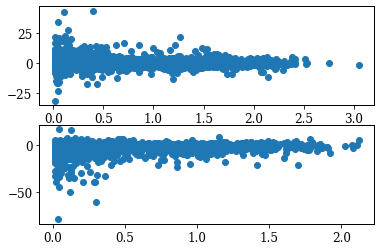

In [13]:
fig, ax = plt.subplots(2)

ax[0].scatter(df.pmra_error,df.pmra)
ax[1].scatter(df.pmdec_error,df.pmdec)

In [14]:
print(np.mean(df.pmdec), np.mean(df.pmdec_error)) ## por que pmra tem um erro muito maior?
print(np.mean(df.pmra), np.mean(df.pmra_error))

-2.379367479303158 0.3661494255065918
0.28730170694035606 0.4801464378833771


In [15]:
condicao = np.abs(0.5*df.pmra) < df.pmra_error
condicao2 = np.abs(0.5*df.pmdec) < df.pmdec_error
condicao3 = np.abs(0.5*df.parallax) < df.parallax_error


df_condicionado = df.drop(df[condicao|condicao2|condicao3].index) #
len(df_condicionado),len(df)

(2030, 5423)

## Dropping uknown values of pmra, pmdec or parallax.

In [16]:
ndf = df_condicionado.dropna(how='any',subset=['pmra', 'pmdec', 'parallax'])
ndf

,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
0,98.351975,20.334892,-0.388570,0.173544,-1.365909,0.122712,1.452368,17.887228,0.417362,0.145713,NaN,NaN,192.788731,5.328890
2,98.350055,20.341862,0.859905,0.025662,-2.641193,0.020173,0.670877,14.261889,0.585068,0.024480,NaN,NaN,192.781672,5.330448
6,98.371566,20.342327,0.193939,0.068145,-6.640513,0.048262,1.080705,15.968001,0.694564,0.056084,NaN,NaN,192.790449,5.348633
9,98.376219,20.344227,1.072295,0.061280,-3.089166,0.043906,0.938309,15.882685,0.204023,0.051718,NaN,NaN,192.790736,5.353383
12,98.366566,20.341821,-0.536920,0.058616,-7.865749,0.041094,0.970015,13.505168,1.255076,0.046573,-17.922256,2.898724,192.788766,5.344226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,98.192627,20.693384,-0.840114,0.077425,-1.228457,0.051598,0.969753,16.221823,0.509162,0.072357,NaN,NaN,192.399868,5.358662
5407,98.187719,20.691228,-0.646549,0.037311,-0.798467,0.026545,1.310552,14.855961,0.213226,0.036361,42.516506,5.983942,192.399702,5.353593
5408,98.207585,20.700299,0.598108,0.115400,-3.397726,0.084840,1.386257,17.202389,0.740891,0.122587,NaN,NaN,192.400062,5.374270
5417,98.203669,20.695968,0.202118,0.082436,0.374853,0.057634,1.014659,16.622982,0.371129,0.087021,NaN,NaN,192.402266,5.369039


In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.preprocessing import StandardScaler

## Creating the arrays to perform the 2-D KNN fit and 5-D DBSCAN fit

In [18]:
X = np.dstack((ndf['pmra'],ndf['pmdec']))[0]
cincoD = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['ra'],ndf['dec'],ndf['parallax']))[0]

## Performing the KNN on the pmra and pmdec.

0.5954370659607893


<Figure size 360x360 with 0 Axes>

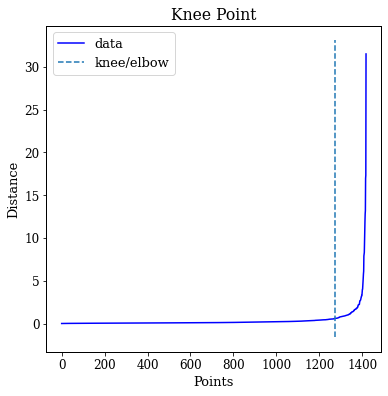

In [44]:
from sklearn.neighbors import NearestNeighbors

#vizinhos = np.sqrt(len(ndf)).astype(int)

vizinhos = 100

nn = NearestNeighbors(n_neighbors=vizinhos).fit(X)

distances, indices = nn.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")


eps_opt = distances[knee.knee]

print(distances[knee.knee])

In [20]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

## Performing DBSCAN

Estimated no. of clusters: 1
Estimated no. of noise points: 1269
Estimated no. points clustered: 150


Text(0, 0.5, 'pmdec')

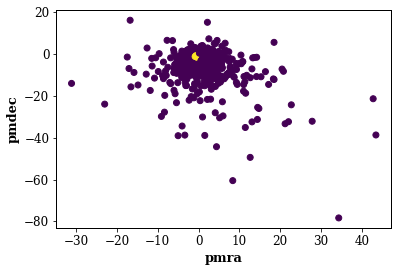

In [45]:
db = DBSCAN(eps=eps_opt, min_samples=vizinhos).fit(cincoD)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(db.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

n_in = list(db.labels_).count(0)
print('Estimated no. points clustered: %d' % n_in)


plt.scatter(X[:, 0], 
            X[:, 1], 
            c=db.labels_, 
            )
plt.xlabel("pmra", fontweight = 'bold')
plt.ylabel("pmdec", fontweight = 'bold')

## Getting the points that are clustered

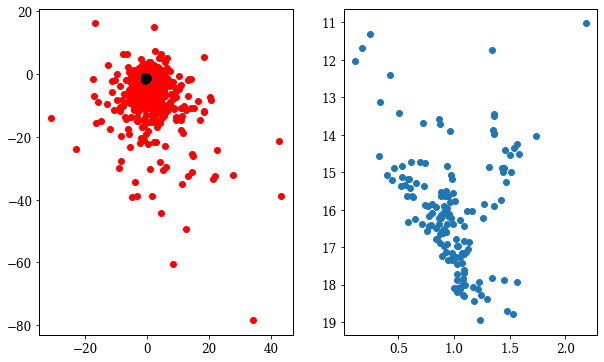

In [46]:
pontos_cluster = np.empty((0,2))
for i in range(len(X)):
    if labels[i]==0:
        pontos_cluster = np.append(pontos_cluster, np.array([X[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue

xin,yin = pontos_cluster.T

pontos_cluster = np.empty((0,2))
for i in range(len(X)):
    if labels[i]==-1:
        pontos_cluster = np.append(pontos_cluster, np.array([X[i]]), axis  = 0) #problema no formato do array para dar append
    else:
        continue


xout, yout = pontos_cluster.T


subset = ndf[ndf['pmra'].isin(xin) & ndf['pmdec'].isin(yin)]
subset = subset.reset_index(drop=True)

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].scatter(xin,yin, color = 'k', zorder = 100)
ax[0].scatter(xout,yout, color = 'red')


ax[1].scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
ax[1].invert_yaxis()


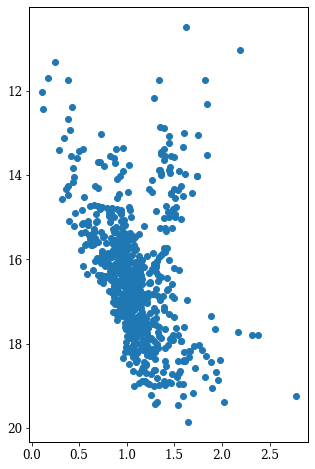

In [23]:
plt.figure(figsize=(5,8))
plt.scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
plt.gca().invert_yaxis()

## Constructing a RDP and histograms of the clusters parameters

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

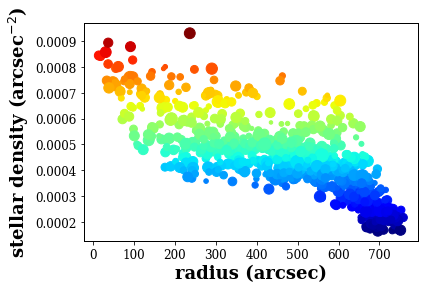

In [24]:
from astropy.coordinates import SkyCoord
from astropy import units

catalog = SkyCoord(ra=subset['ra']*units.degree, dec=subset['dec']*units.degree, frame='fk5')

nstar = len(subset)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([subset['ra']*np.cos(subset['dec']*np.pi/180.0), subset['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(subset['ra'], weights=den_data)
std_x = np.average((subset['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(subset['dec'], weights=den_data)
std_y = np.average((subset['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value

#.criando figura do RDP

import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()#1,1,figsize=(10,11))
ax.scatter(radii,den_data, s=(max(subset['phot_g_mean_mag'])-subset['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



## Plotting histograms

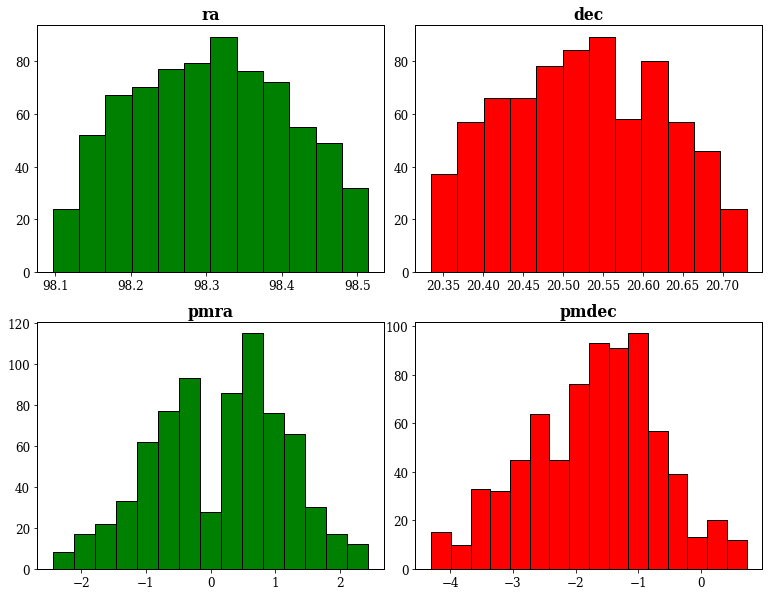

In [25]:
fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(subset['ra'], bins = 'fd')
ax1.hist(subset['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['pmra'], bins = 'fd')
ax2.hist(subset['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['dec'], bins = 'fd')
ax3.hist(subset['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(subset['pmdec'], bins = 'fd')
ax4.hist(subset['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


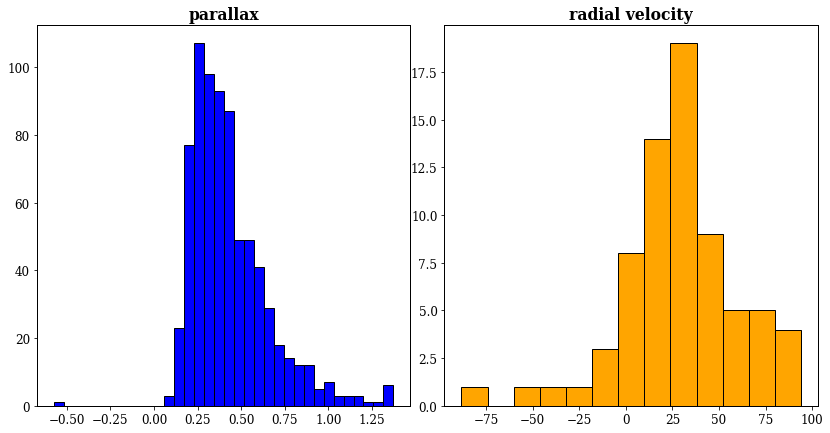

In [26]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,4, (1,6))

optimal_bin = np.histogram_bin_edges(subset['parallax'], bins = 'fd')
ax1.hist(subset['parallax'], optimal_bin, ec = 'k',color = 'blue');

ax2 = fig.add_subplot(2,4, (3,8))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax2.hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');

ax1.set_title('parallax', fontweight = 'bold')
ax2.set_title('radial velocity', fontweight = 'bold');

## Gaussian fit

In [27]:
def gaussiana(x, amp, mu, sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma**2))

from lmfit.models import GaussianModel

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 34
    # variables        = 3
    chi-square         = 3144.37451
    reduced chi-square = 101.431436
    Akaike info crit   = 159.918331
    Bayesian info crit = 164.497413
[[Variables]]
    amplitude:  40.1567402 +/- 2.24064593 (5.58%) (init = 37.89089)
    center:     0.34854032 +/- 0.01016196 (2.92%) (init = 0.3105352)
    sigma:      0.15772796 +/- 0.01016225 (6.44%) (init = 0.1180402)
    fwhm:       0.37142095 +/- 0.02393026 (6.44%) == '2.3548200*sigma'
    height:     101.568692 +/- 5.66725314 (5.58%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


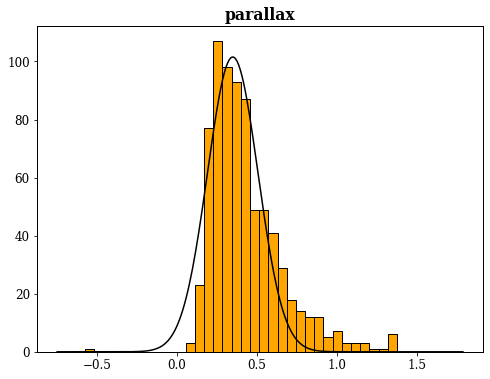

In [28]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['parallax']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'orange');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(1.3*bins[0],1.3*bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('parallax', fontweight = 'bold')

plt.show()

In [29]:
#primeiro_clip = subset.parallax[np.where((subset.parallax < sigma_parallax_up ) & (subset.parallax > sigma_parallax_down))[0]]
#primeiro_clip

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 12
    # variables        = 3
    chi-square         = 298.909815
    reduced chi-square = 33.2122017
    Akaike info crit   = 44.5828231
    Bayesian info crit = 46.0375430
[[Variables]]
    amplitude:  32.7519585 +/- 1.35182939 (4.13%) (init = 22.21064)
    center:     98.3034862 +/- 0.00626240 (0.01%) (init = 98.28626)
    sigma:      0.15411481 +/- 0.00832080 (5.40%) (init = 0.1139007)
    fwhm:       0.36291263 +/- 0.01959398 (5.40%) == '2.3548200*sigma'
    height:     84.7818706 +/- 2.86289276 (3.38%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.780


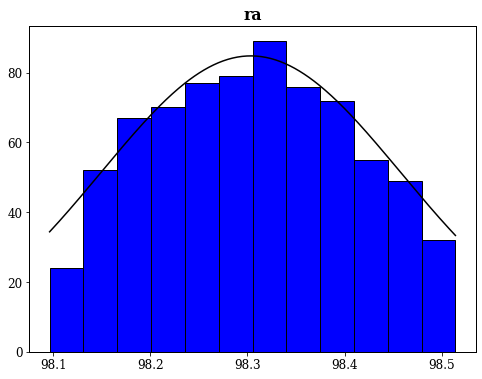

In [30]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['ra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('ra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 15
    # variables        = 3
    chi-square         = 5374.55983
    reduced chi-square = 447.879986
    Akaike info crit   = 94.2207263
    Bayesian info crit = 96.3448770
[[Variables]]
    amplitude:  270.970530 +/- 33.4800763 (12.36%) (init = 391.1416)
    center:     0.23204991 +/- 0.17259582 (74.38%) (init = 0.1961442)
    sigma:      1.23892646 +/- 0.18422554 (14.87%) (init = 1.21851)
    fwhm:       2.91744880 +/- 0.43381800 (14.87%) == '2.3548200*sigma'
    height:     87.2542564 +/- 10.5164584 (12.05%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.622


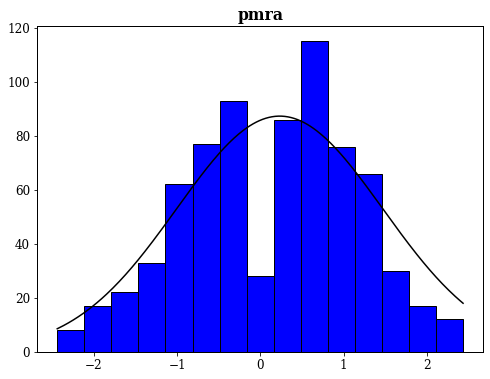

In [31]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmra= [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 12
    # variables        = 3
    chi-square         = 731.730573
    reduced chi-square = 81.3033970
    Akaike info crit   = 55.3260687
    Bayesian info crit = 56.7807887
[[Variables]]
    amplitude:  31.7380343 +/- 2.18743893 (6.89%) (init = 28.02477)
    center:     20.5203414 +/- 0.01004242 (0.05%) (init = 20.51454)
    sigma:      0.15278310 +/- 0.01382235 (9.05%) (init = 0.1437168)
    fwhm:       0.35977671 +/- 0.03254915 (9.05%) == '2.3548200*sigma'
    height:     82.8733290 +/- 4.43037081 (5.35%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.808
    C(center, sigma)     = -0.105
    C(amplitude, center) = -0.102


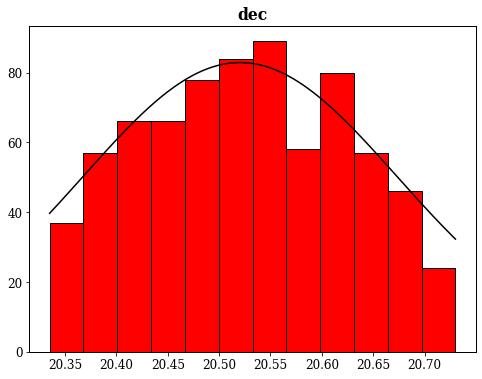

In [32]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['dec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_dec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('dec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 16
    # variables        = 3
    chi-square         = 2134.49080
    reduced chi-square = 164.191600
    Akaike info crit   = 84.2943148
    Bayesian info crit = 86.6120810
[[Variables]]
    amplitude:  250.058906 +/- 18.5984154 (7.44%) (init = 262.7206)
    center:    -1.59006777 +/- 0.09691954 (6.10%) (init = -1.509141)
    sigma:      1.14040288 +/- 0.09989180 (8.76%) (init = 1.006592)
    fwhm:       2.68544350 +/- 0.23522721 (8.76%) == '2.3548200*sigma'
    height:     87.4770463 +/- 6.44972197 (7.37%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.596


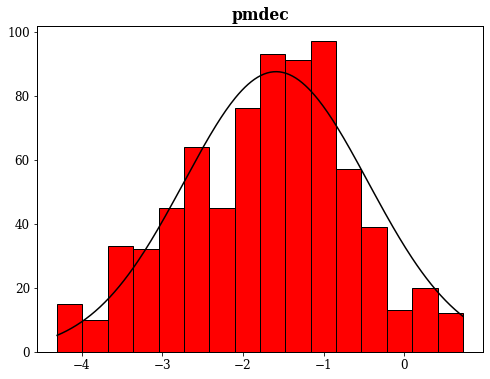

In [33]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmdec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmdec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmdec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 53
    # data points      = 13
    # variables        = 3
    chi-square         = 43.2649130
    reduced chi-square = 4.32649130
    Akaike info crit   = 21.6311041
    Bayesian info crit = 23.3259522
[[Variables]]
    amplitude:  955.489497 +/- 89.6295332 (9.38%) (init = 1730.926)
    center:     29.5895768 +/- 2.49020783 (8.42%) (init = 33.31305)
    sigma:      22.9917348 +/- 2.49090467 (10.83%) (init = 30.36713)
    fwhm:       54.1413970 +/- 5.86563212 (10.83%) == '2.3548200*sigma'
    height:     16.5792264 +/- 1.55517961 (9.38%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


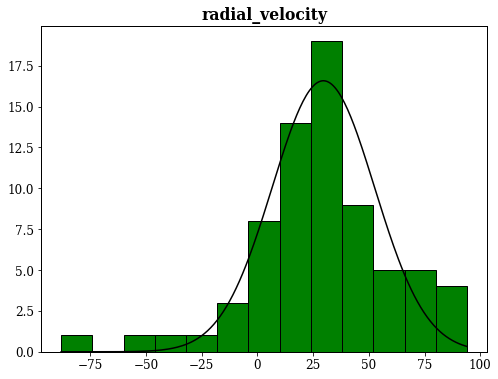

In [34]:
fig, ax = plt.subplots(figsize=(8,6))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

data = ra_vel['radial_velocity']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'green');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]

valores_radial_velocity= [result.params['center'].value, result.params['sigma'].value]


xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('radial_velocity', fontweight = 'bold')

plt.show()


In [35]:
sigma = 3

paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]

print(paralaxe_up,valores_paralaxe[0], paralaxe_down)

ra_up, ra_down = valores_ra[0] + sigma*valores_ra[1], valores_ra[0] - sigma*valores_ra[1]

print(ra_up,valores_ra[0],ra_down)

pmra_up, pmra_down = valores_pmra[0] + sigma*valores_pmra[1], valores_pmra[0] - sigma*valores_pmra[1]

print(pmra_up,valores_pmra[0],pmra_down)

dec_up, dec_down = valores_dec[0] + sigma*valores_dec[1], valores_dec[0] - sigma*valores_dec[1]

print(dec_up, valores_dec[0], dec_down)

pmdec_up, pmdec_down = valores_pmdec[0] + sigma*valores_pmdec[1], valores_pmdec[0] - sigma*valores_pmdec[1]

print(pmdec_up,valores_pmdec[0],pmdec_down)

radvel_up, radvel_down = valores_radial_velocity[0] + sigma*valores_radial_velocity[1], valores_radial_velocity[0] - sigma*valores_radial_velocity[1]

print(radvel_up, valores_radial_velocity[0], radvel_down)

0.8217241966152249 0.3485403238115315 -0.12464354899216196
98.76583063315917 98.303486211594 97.84114179002884
3.94882927566891 0.2320499091828902 -3.4847294573031293
20.978690720012168 20.520341409891852 20.061992099771537
1.8311408541972531 -1.5900677715760867 -5.011276397349427
98.56478128311062 29.58957679321432 -39.38562769668198


In [36]:
clip = subset.loc[(subset.parallax < paralaxe_up ) & (subset.parallax > paralaxe_down) & (subset.ra>ra_down) & (subset.ra<ra_up)
          & (subset.dec>dec_down) & (subset.dec<dec_up) & (subset.pmra>pmra_down) & (subset.pmra<pmra_up) & (subset.pmdec>pmdec_down) & (subset.pmdec<pmdec_up)]
len(clip)

692

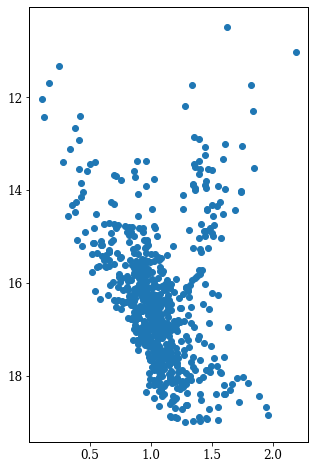

In [37]:
plt.figure(figsize=(5,8))
plt.scatter(clip['bp_rp'],clip['phot_g_mean_mag'])
plt.gca().invert_yaxis()

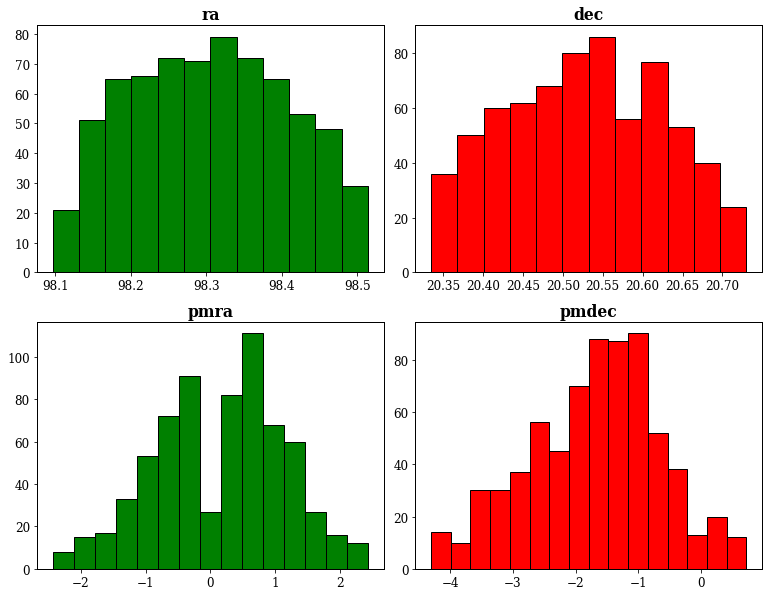

In [38]:
fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(clip['ra'], bins = 'fd')
ax1.hist(clip['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip['pmra'], bins = 'fd')
ax2.hist(clip['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip['dec'], bins = 'fd')
ax3.hist(clip['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(clip['pmdec'], bins = 'fd')
ax4.hist(clip['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


In [39]:
len(clip),len(subset)

(692, 742)

## Doing more sigma clippings

742
214


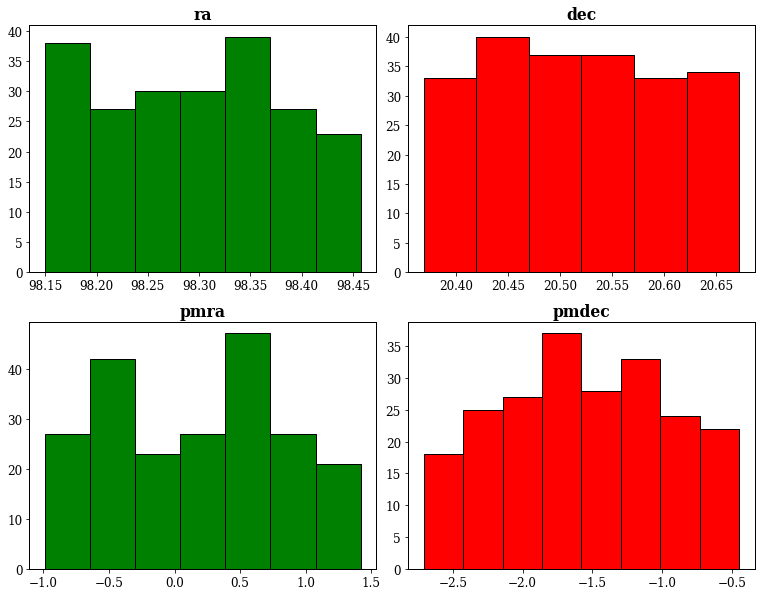

In [40]:
gmodel = GaussianModel()
clip_loop = subset

for i in range(1):
    print(len(clip_loop))
    data = clip_loop['ra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_ra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['dec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_dec = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]


    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


    sigma = 1

    paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]
    ra_up, ra_down = valores_ra[0] + sigma*valores_ra[1], valores_ra[0] - sigma*valores_ra[1]
    pmra_up, pmra_down = valores_pmra[0] + sigma*valores_pmra[1], valores_pmra[0] - sigma*valores_pmra[1]
    dec_up, dec_down = valores_dec[0] + sigma*valores_dec[1], valores_dec[0] - sigma*valores_dec[1]
    pmdec_up, pmdec_down = valores_pmdec[0] + sigma*valores_pmdec[1], valores_pmdec[0] - sigma*valores_pmdec[1]
    radvel_up, radvel_down = valores_radial_velocity[0] + sigma*valores_radial_velocity[1], valores_radial_velocity[0] - sigma*valores_radial_velocity[1]
    clip_loop = clip_loop.loc[(clip_loop.parallax < paralaxe_up ) & (clip_loop.parallax > paralaxe_down) & (clip_loop.ra>ra_down) & (clip_loop.ra<ra_up) & (clip_loop.dec>dec_down) & (clip_loop.dec<dec_up) & (clip_loop.pmra>pmra_down) & (clip_loop.pmra<pmra_up) & (clip_loop.pmdec>pmdec_down) & (clip_loop.pmdec<pmdec_up)]

    
print(len(clip_loop))

fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(clip_loop['ra'], bins = 'fd')
ax1.hist(clip_loop['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip_loop['pmra'], bins = 'fd')
ax2.hist(clip_loop['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip_loop['dec'], bins = 'fd')
ax3.hist(clip_loop['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(clip_loop['pmdec'], bins = 'fd')
ax4.hist(clip_loop['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


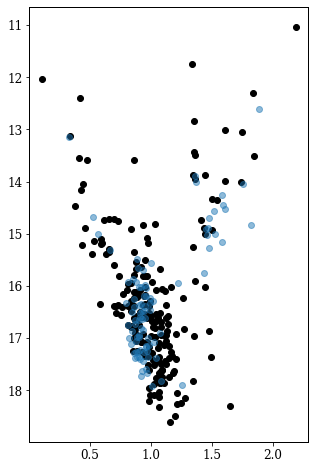

In [43]:
cantat = pd.read_csv('berkeley23.csv')



plt.figure(figsize=(5,8))
plt.scatter(clip_loop['bp_rp'],clip_loop['phot_g_mean_mag'], color = 'black')
plt.scatter(cantat['BP-RP'],cantat['Gmag'], alpha = 0.5)
plt.gca().invert_yaxis()